In [1]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk

In [2]:
depression = pd.read_csv("Mental-Health-Twitter.csv")

In [3]:
df = depression.copy()

## Sentiment Analysis

Remove:

- User name

- Hashtag

- URL Link 

- Punctuation

- Stop words(word lengths less than 3 or 4 are fine to remove because words will be like (I’m, are, is) they don’t have any specific meaning)

- Numbers

- Rt("Retweet")

- Lowercase all the text

In [4]:
def remove_username(col):
    col = df['post_text'].apply(lambda sr: re.sub(r'@(\w+)', '', sr))
    return col
df['post_text'] = remove_username(df['post_text'])
df['post_text']

0        It's just over 2 years since I was diagnosed w...
1        It's Sunday, I need a break, so I'm planning t...
2        Awake but tired. I need to sleep but my brain ...
3        RT : #Retro bears make perfect gifts and are g...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                A day without sunshine is like night.
19996    Boren's Laws: (1) When in charge, ponder. (2) ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor, but they were never ...
19999       Black holes are where God is dividing by zero.
Name: post_text, Length: 20000, dtype: object

In [5]:
def remove_hashtag(col):
    col = df['post_text'].apply(lambda sr: re.sub(r'#', '', sr))
    return col
df['post_text'] = remove_hashtag(df['post_text'])
df['post_text']

0        It's just over 2 years since I was diagnosed w...
1        It's Sunday, I need a break, so I'm planning t...
2        Awake but tired. I need to sleep but my brain ...
3        RT : Retro bears make perfect gifts and are gr...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                A day without sunshine is like night.
19996    Boren's Laws: (1) When in charge, ponder. (2) ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor, but they were never ...
19999       Black holes are where God is dividing by zero.
Name: post_text, Length: 20000, dtype: object

In [6]:
def remove_url(col):
    col = df['post_text'].apply(lambda sr: re.sub(r'\s*https?://\S+(\s+|$)', '', sr))
    return col
df['post_text'] = remove_url(df['post_text'])
df['post_text']

0        It's just over 2 years since I was diagnosed w...
1        It's Sunday, I need a break, so I'm planning t...
2        Awake but tired. I need to sleep but my brain ...
3        RT : Retro bears make perfect gifts and are gr...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                A day without sunshine is like night.
19996    Boren's Laws: (1) When in charge, ponder. (2) ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor, but they were never ...
19999       Black holes are where God is dividing by zero.
Name: post_text, Length: 20000, dtype: object

In [7]:
def remove_punct(col):
    remove = string.punctuation
    # remove = remove.replace("-", "")
    # print(remove)
    # pattern = r"[{}]".format(re.escape(remove))
    pattern = r"[{}]".format(re.escape(remove))
    df['post_text'] = df['post_text'].str.replace(pattern, "", regex=True)
    
remove_punct(df['post_text'])
df['post_text']

0        Its just over 2 years since I was diagnosed wi...
1        Its Sunday I need a break so Im planning to sp...
2        Awake but tired I need to sleep but my brain h...
3        RT  Retro bears make perfect gifts and are gre...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                 A day without sunshine is like night
19996    Borens Laws 1 When in charge ponder 2 When in ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor but they were never m...
19999        Black holes are where God is dividing by zero
Name: post_text, Length: 20000, dtype: object

In [8]:
def remove_rt(col):
    col = df['post_text'].apply(lambda sr: re.sub(r'RT', '', sr))
    return col
df['post_text'] = remove_rt(df['post_text'])
df['post_text']

0        Its just over 2 years since I was diagnosed wi...
1        Its Sunday I need a break so Im planning to sp...
2        Awake but tired I need to sleep but my brain h...
3          Retro bears make perfect gifts and are great...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                 A day without sunshine is like night
19996    Borens Laws 1 When in charge ponder 2 When in ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor but they were never m...
19999        Black holes are where God is dividing by zero
Name: post_text, Length: 20000, dtype: object

In [9]:
def remove_num(col):
    col = df['post_text'].apply(lambda sr: re.sub(r'\d+', '', sr))
    return col
df['post_text'] = remove_num(df['post_text'])
df['post_text']

0        Its just over  years since I was diagnosed wit...
1        Its Sunday I need a break so Im planning to sp...
2        Awake but tired I need to sleep but my brain h...
3          Retro bears make perfect gifts and are great...
4        It’s hard to say whether packing lists are mak...
                               ...                        
19995                 A day without sunshine is like night
19996    Borens Laws  When in charge ponder  When in tr...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor but they were never m...
19999        Black holes are where God is dividing by zero
Name: post_text, Length: 20000, dtype: object

In [10]:
def lowercase(col):
    col = col.str.lower()
    return col
df['post_text'] = lowercase(df['post_text'])
df['post_text']

0        its just over  years since i was diagnosed wit...
1        its sunday i need a break so im planning to sp...
2        awake but tired i need to sleep but my brain h...
3          retro bears make perfect gifts and are great...
4        it’s hard to say whether packing lists are mak...
                               ...                        
19995                 a day without sunshine is like night
19996    borens laws  when in charge ponder  when in tr...
19997    the flow chart is a most thoroughly oversold p...
19998    ships are safe in harbor but they were never m...
19999        black holes are where god is dividing by zero
Name: post_text, Length: 20000, dtype: object

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Remove stop words
def remove_stopwords(col):
    df['post_text'] = df['post_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

remove_stopwords(df['post_text'])
df['post_text'][:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    years since diagnosed anxiety depression today...
1    sunday need break im planning spend little tim...
2                   awake tired need sleep brain ideas
3    retro bears make perfect gifts great beginners...
4    it’s hard say whether packing lists making lif...
5           making packing lists new hobby movinghouse
6    point keeping stuff nostalgic reasons cross li...
7    currently findingboxesofrandomshit packing pha...
8            cant bothered cook take away way 😁👍🏼 lazy
9    itv releases promo video final series downton ...
Name: post_text, dtype: object

In [12]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 235.3 kB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [13]:
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [14]:
# credit: https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7
# 'Emoji_Dict.p'- download link https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
# with open('Emoji_Dict.p', 'rb') as fp:
#     Emoji_Dict = pickle.load(fp)
# Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(col):
    for emot in UNICODE_EMOJI:
        df['post_text'] = df['post_text'].apply(lambda sr: sr.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))) 

convert_emojis_to_word(df['post_text'])
df['post_text'][:10]

0    years since diagnosed anxiety depression today...
1    sunday need break im planning spend little tim...
2                   awake tired need sleep brain ideas
3    retro bears make perfect gifts great beginners...
4    it’s hard say whether packing lists making lif...
5           making packing lists new hobby movinghouse
6    point keeping stuff nostalgic reasons cross li...
7    currently findingboxesofrandomshit packing pha...
8    cant bothered cook take away way beaming_face_...
9    itv releases promo video final series downton ...
Name: post_text, dtype: object

- Which word are most frequently used?

In [15]:
nltk.download('punkt')
a = df['post_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
df_all = pd.DataFrame(word_dist.most_common(), columns=['Word', 'Frequency'])
df_all[:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Word,Frequency
0,im,1278
1,like,981
2,depression,875
3,dont,809
4,one,697
5,get,606
6,love,594
7,know,577
8,people,559
9,amp,491


- Which word are most frequently used in the posts labeled 0 and in the posts labeled 1?

In [16]:
df_label_0 = df[df["label"]==0]
a = df_label_0['post_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
df0 = pd.DataFrame(word_dist.most_common(), columns=['Word', 'Frequency'])
df0[:20]

,Word,Frequency
0,im,546
1,like,464
2,dont,383
3,one,366
4,trump,334
5,thank,324
6,say,306
7,know,292
8,love,279
9,yong,269


In [17]:
df_label_1 = df[df["label"]==1]
a = df_label_1['post_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
df1 = pd.DataFrame(word_dist.most_common(), columns=['Word', 'Frequency'])
df1[:20]

,Word,Frequency
0,depression,867
1,im,732
2,like,517
3,dont,426
4,get,394
5,one,331
6,love,315
7,people,304
8,know,285
9,treatments,268


- Data visualization: Word Cloud

In [18]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 336.0 kB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [19]:
from wordcloud import WordCloud

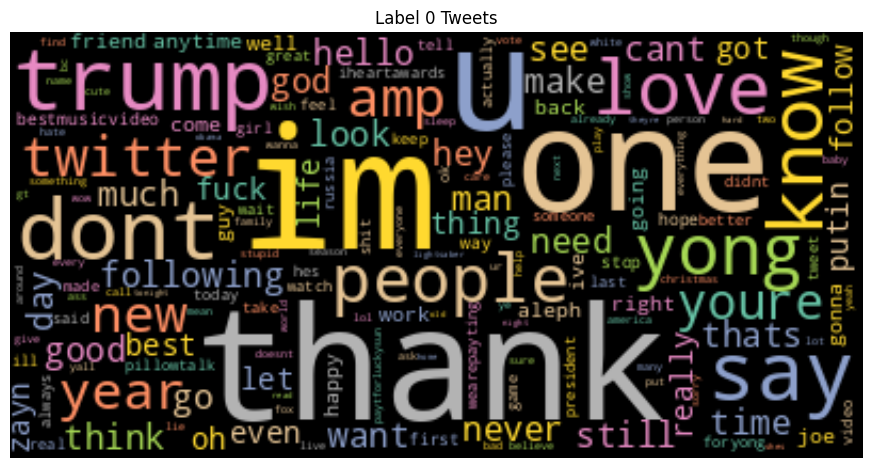

In [20]:
text_0 = " ".join(i for i in df_label_0["post_text"])
wordcloud = WordCloud(
    background_color="black",
    colormap="Set2",
    collocations=False).generate(text_0)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Label 0 Tweets")
plt.show()

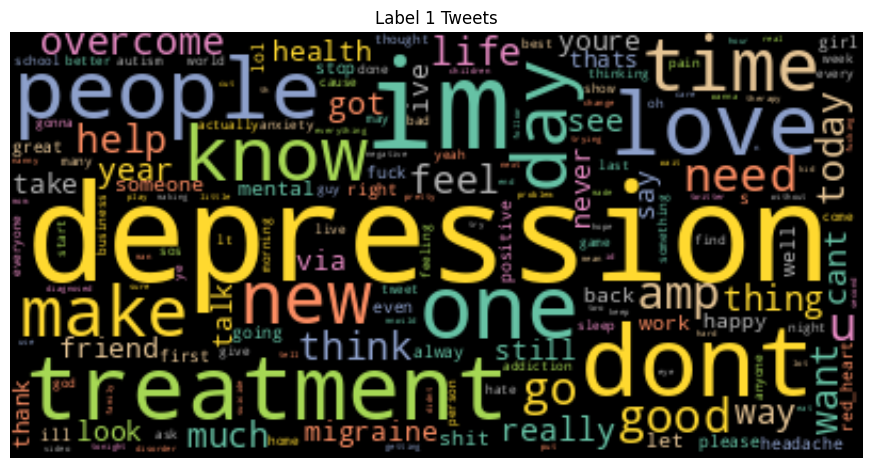

In [21]:
text_1 = " ".join(i for i in df_label_1["post_text"])
wordcloud = WordCloud(
    background_color="black",
    colormap="Set2",
    collocations=False).generate(text_1)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Label 1 Tweets")
plt.show()

- Sentiment scores

In [22]:
# One way: use vader
# !pip install vaderSentiment

In [23]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# sid_obj = SentimentIntensityAnalyzer()

In [24]:
# Another way: use SentimentIntensityAnalyzer from nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [25]:
# df['Polarity Score']=df["post_text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
# df

df['Polarity Score']=df["post_text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["post_text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["post_text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["post_text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

In [26]:
df['Emotion']=''
df.loc[df['Polarity Score']>0,'Emotion']='Positive'
df.loc[df['Polarity Score']==0,'Emotion']='Neutral'
df.loc[df['Polarity Score']<0,'Emotion']='Negative'
df[:20]

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Polarity Score,Neutral Score,Negative Score,Positive Score,Emotion
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,years since diagnosed anxiety depression today...,1013187241,84,211,251,837,0,1,-0.6597,0.690,0.310,0.000,Negative
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,sunday need break im planning spend little tim...,1013187241,84,211,251,837,1,1,0.0000,1.000,0.000,0.000,Neutral
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,awake tired need sleep brain ideas,1013187241,84,211,251,837,0,1,-0.4404,0.633,0.367,0.000,Negative
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,retro bears make perfect gifts great beginners...,1013187241,84,211,251,837,2,1,0.9042,0.472,0.000,0.528,Positive
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,it’s hard say whether packing lists making lif...,1013187241,84,211,251,837,1,1,0.1779,0.670,0.173,0.156,Positive
5,5,637692793083817985,Sat Aug 29 18:26:24 +0000 2015,making packing lists new hobby movinghouse,1013187241,84,211,251,837,1,1,0.0000,1.000,0.000,0.000,Neutral
6,6,637691649943072772,Sat Aug 29 18:21:51 +0000 2015,point keeping stuff nostalgic reasons cross li...,1013187241,84,211,251,837,1,1,0.0000,1.000,0.000,0.000,Neutral
7,7,637689418472652800,Sat Aug 29 18:12:59 +0000 2015,currently findingboxesofrandomshit packing pha...,1013187241,84,211,251,837,0,1,0.0000,1.000,0.000,0.000,Neutral
8,8,637687177946734592,Sat Aug 29 18:04:05 +0000 2015,cant bothered cook take away way beaming_face_...,1013187241,84,211,251,837,0,1,-0.1376,0.574,0.239,0.188,Negative
9,9,637684866906255360,Sat Aug 29 17:54:54 +0000 2015,itv releases promo video final series downton ...,1013187241,84,211,251,837,41,1,0.0000,1.000,0.000,0.000,Neutral


In [27]:
df_neg = df[df["Emotion"] == "Negative"]
df_pos = df[df["Emotion"] == "Positive"]
print(f'The percentage of negative texts in label 1 Tweets: {df_neg[df_neg["label"] == 1].size / df_label_1.size}')
print(f'The percentage of positive texts in label 1 Tweets: {df_pos[df_pos["label"] == 1].size / df_label_1.size}')

df_neg = df[df["Emotion"] == "Negative"]
df_pos = df[df["Emotion"] == "Positive"]
print(f'The percentage of negative texts in label 0 Tweets: {df_neg[df_neg["label"] == 0].size / df_label_0.size}')
print(f'The percentage of positive texts in label 0 Tweets: {df_pos[df_pos["label"] == 0].size / df_label_0.size}')

The percentage of negative texts in label 1 Tweets: 0.45832727272727275
The percentage of positive texts in label 1 Tweets: 0.5461818181818182
The percentage of negative texts in label 0 Tweets: 0.33352727272727273
The percentage of positive texts in label 0 Tweets: 0.5476363636363636


In [28]:
# try to apply lemmatizer and stemming to tokens

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a6749d3-7805-4e72-9b13-9d4cebfc5e43' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>